Leading Club Case Study
Approch 


Step 1: Understand the excel
Step 2: Perform df Cleaning (if required )
Step 3: df Analysis
Step 4: df visualization


Importing Libraries

In [1]:
import numpy as np #it will help while prsentation and mathematical operation
import pandas as pd #for dealing with excel dfframe 
import seaborn as sns # for chart
import matplotlib.pyplot as plt # for chart
import warnings #supress warnings

warnings.filterwarnings('ignore')

In [2]:
# First Step is to read the excel and store it into a df frame
loan_df=pd.read_csv("loan.csv")
#print head
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#cheking number of rows and columns 
loan_df.shape

(39717, 111)

In [99]:
# Now Checking for null values (if any)
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [3]:
# as we can see there are null values in some of columns 
# we will make use of dropna to delete them 

loan_df.dropna(axis = 1, how = 'all', inplace = True)


In [101]:
# now lets agian check the shape
loan_df.shape

(39717, 57)

In [102]:
# As we can see firstly we were having 111 rows now 57 left .
# lets check for null value again
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [103]:
# Now Lets Check for dftypes of columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [104]:
# As We can See Some of Colums are Object
# lets checks values for emp_length
loan_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [4]:
#We can Remove Years < and +  signs to make it correct 

loan_df.emp_length = pd.to_numeric(loan_df.emp_length.apply(lambda x: 0 if "<" in str(x) else (x.split('+')[0] if "+" in str(x) else str(x).split()[0])))

ValueError: Unable to parse string "nan" at position 168

In [ ]:
#Getting Error Due to NuLL Values Lets Handle it First

In [ ]:
#Now Lets Check For Missing Value

loan_df[loan_df.isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# As We can see there are many Null Values lets check the columns
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [5]:
#As we observed there are muntiple single valued and Unwanted( Not Required for this use case) columns Lets Drop Them as they are not required
loan_df.drop([ 'policy_code',"initial_list_status","id","delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt",'pymnt_plan','pub_rec_bankruptcies','acc_now_delinq', 'application_type','collections_12_mths_ex_med' , 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [6]:
#Now As We Do Not  Need df For  Loan_status=Current (We can't do anything with this df as loan is in current status) lets delete it
loan_df= loan_df[loan_df.loan_status != "Current"] # storing the df where loan status is not == Current


In [ ]:
# Lets Check Again For Null Values (if Any)
loan_df.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

In [ ]:
# HMMMMM!! there are null values in emp_df and revol_util
# lets checks df for values in emp_length
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [7]:
# This is the length of eployment (as given df dictonary) so its not a critcal df and we can fill it
# with the which is Most Occured For that lets make use of fillna and mode functinos 
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True) 

In [13]:
# Now lets Lets Treat df for revol_util
loan_df.revol_util.isnull().sum()
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

In [9]:
# it contains Total open to buy on revolving bankcards. lets go ahead and delete
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


In [ ]:
# Now Lets Check for Null Values to confirm
loan_df.isnull().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

In [14]:
# Now Treat Null Values

loan_df.emp_length = pd.to_numeric(loan_df.emp_length.apply(lambda x: 0 if "<" in str(x) else (str(x).split('+')[0] if "+" in str(x) else str(x).split()[0])))
loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : str(x).split('%')[0]))
loan_df.int_rate = pd.to_numeric(loan_df.int_rate.apply(lambda x : str(x).split('%')[0]))

In [106]:
#Now Again Check the dftypes
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#Outlier Treatment


<AxesSubplot: >

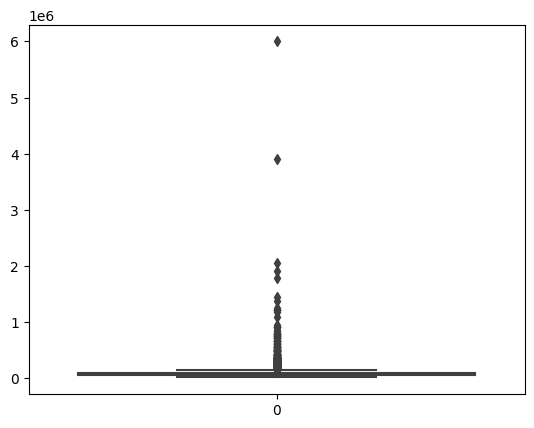

In [108]:
sns.boxplot(loan_df['annual_inc'])

In [15]:
#lets check the df for annual income
df_quant = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
df_quant

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [16]:
 #values after 95 percentile seems to be disconected from the general distribution so lets delete it
annualdf = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= annualdf]

<AxesSubplot: >

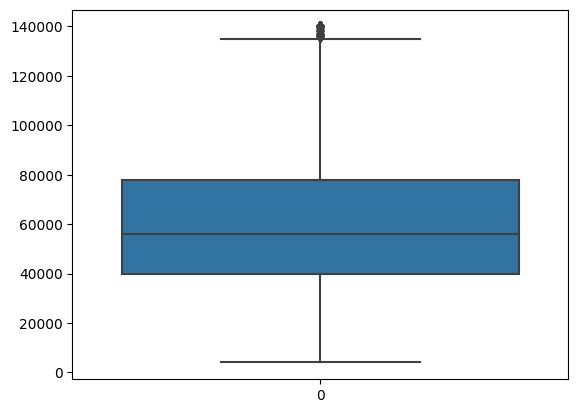

In [13]:
#Lets check again
sns.boxplot(loan_df.annual_inc)

<AxesSubplot: >

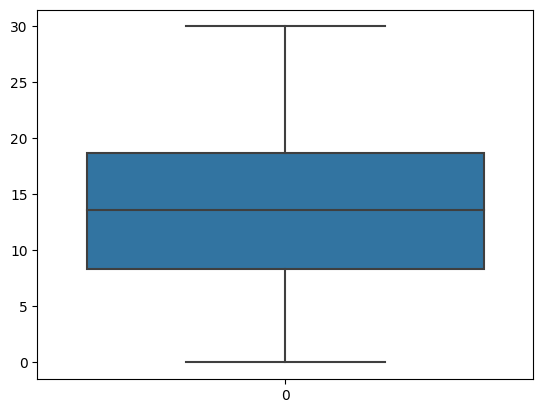

In [14]:
#Looks Good For Annual Inc 
#Let's analyze other numerical variables which could possibly have outliers.funded_amnt_inv,dti,loan_amnt
sns.boxplot(loan_df.dti)

<AxesSubplot: >

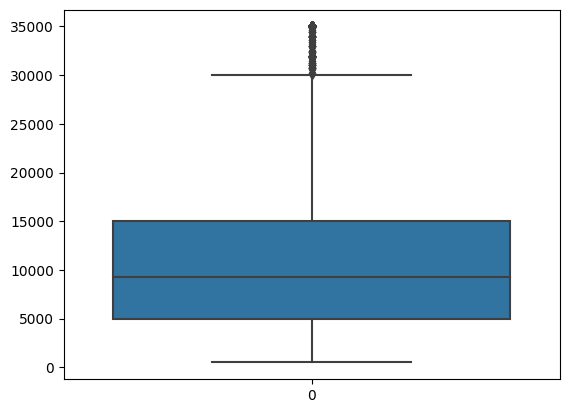

In [15]:
#dti is good lets check loan amunt
sns.boxplot(loan_df.loan_amnt)

<AxesSubplot: >

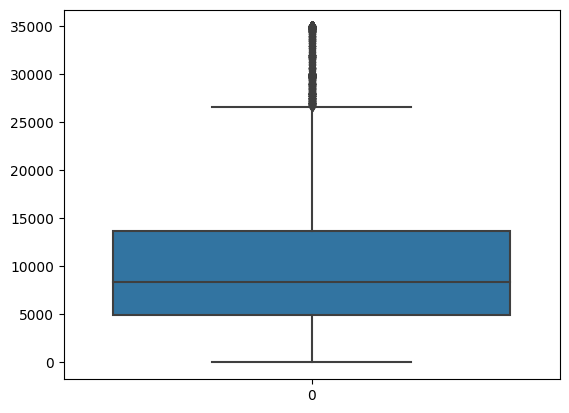

In [16]:
# df is stable till a specific range ..we can delete or leave it as it is
#lets check funded amount
sns.boxplot(loan_df.funded_amnt_inv)

In [ ]:
#same case here also


Visualizing Categorical df

<AxesSubplot: xlabel='loan_status', ylabel='count'>

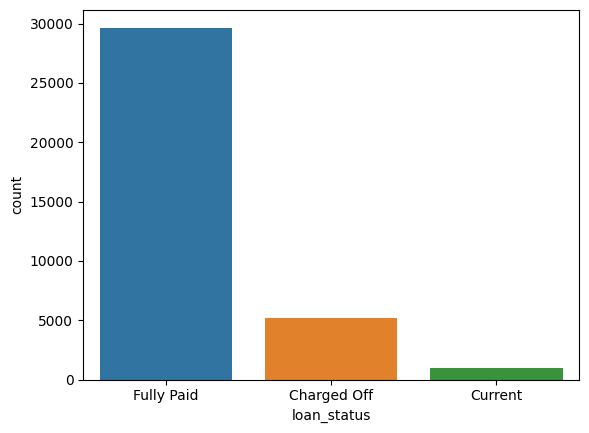

In [126]:
#visualizing only the defaulter df. So subsetting the df while plotting only for 'Charged Off' loan_status
sns.countplot(x = 'loan_status', df = loan_df)

Analyzing Ownership (home_ownership column)

In [128]:
loan_df.home_ownership.value_counts()

RENT        17972
MORTGAGE    14979
OWN          2834
OTHER          90
NONE            2
Name: home_ownership, dtype: int64

In [17]:
#found 2 NONE df lets replace
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
#recheck
loan_df.home_ownership.value_counts()


RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          94
Name: home_ownership, dtype: int64

<AxesSubplot: xlabel='home_ownership', ylabel='count'>

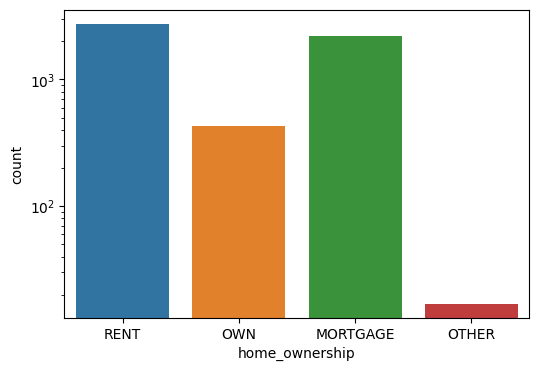

In [19]:
#we are good now lets plot graph for 

fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [20]:
## Extracting month and year
df_month_year = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']=df_month_year[0]                       
loan_df['issue_year']='20' + df_month_year[2]
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.4,4,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.5,10,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21.0,37,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.3,12,Dec,2011


In [21]:

loan_df['installment_groups'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_df['funded_amnt_inv_group'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['dti_groups'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot: xlabel='funded_amnt_inv_group', ylabel='count'>

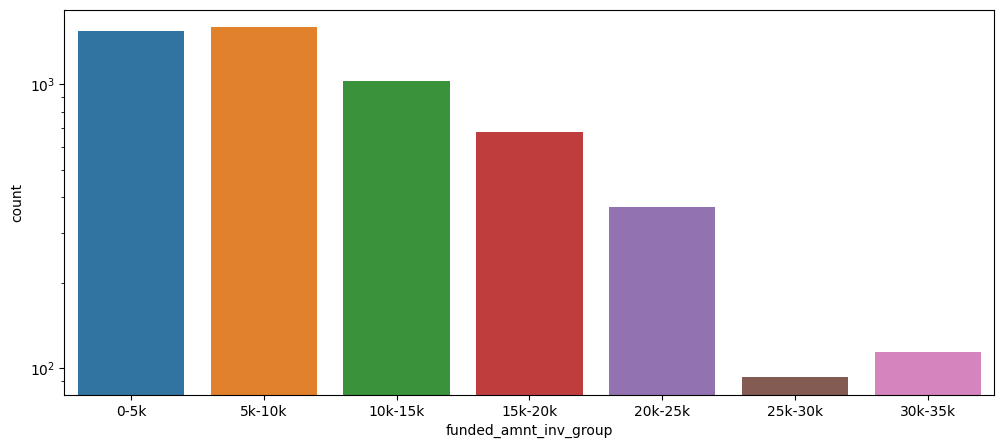

In [22]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_df[loan_df['loan_status']=='Charged Off'])

<AxesSubplot: xlabel='loan_amnt_groups', ylabel='count'>

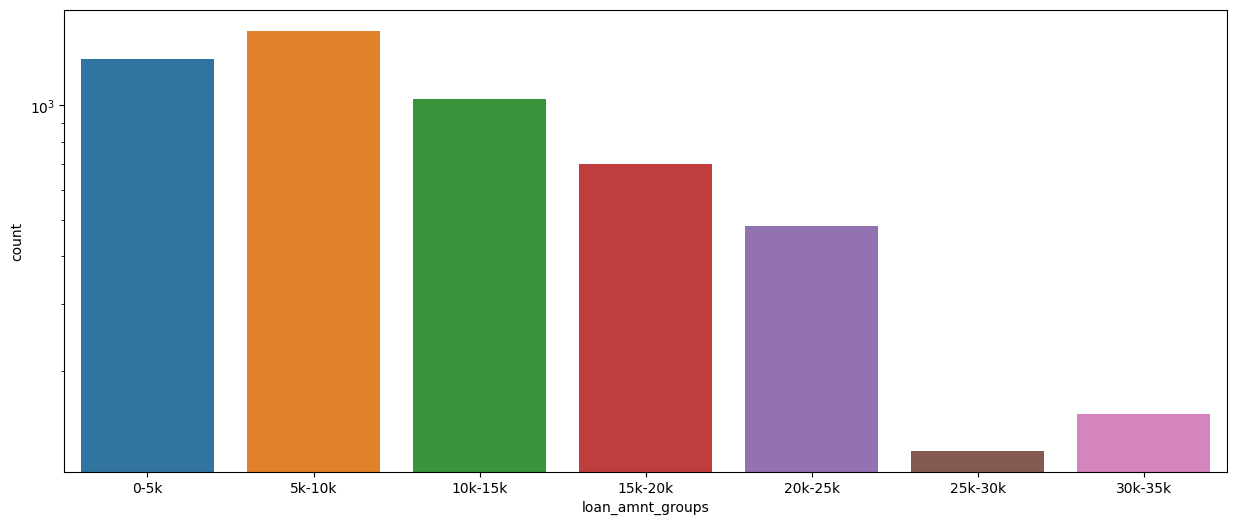

In [24]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

<AxesSubplot: xlabel='dti_groups', ylabel='count'>

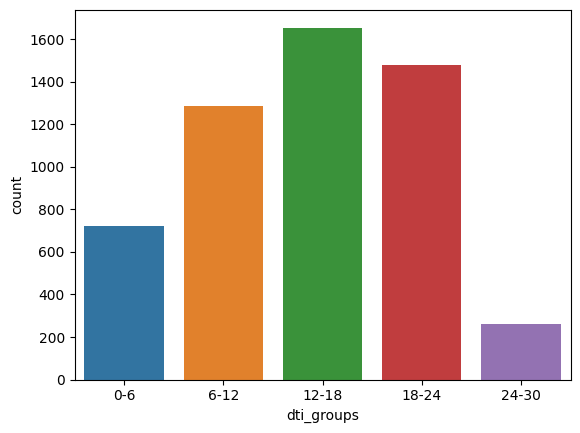

In [26]:
sns.countplot(x='dti_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

<AxesSubplot: xlabel='installment_groups', ylabel='count'>

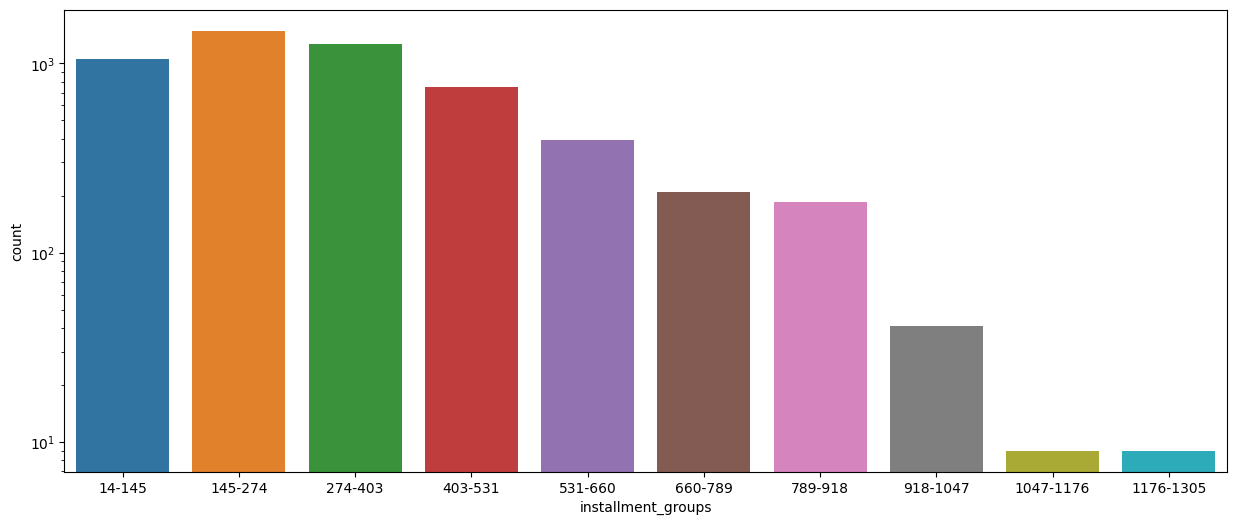

In [28]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

Below Are the Findings 

For Charged Off Loans 

When the no of enquiries in last 6 months is 0
When funded amount by investor is between 5000-10000
Applicants who receive interest at the rate of 13-17%
Applicants who have an income of range 31201 - 58402
Applicants who have 20-37 open_acc
When the number of derogatory public records is 0
When the purpose is 'debt_consolidation'
Grade is 'B'
And a total grade of 'B5' level.

# Analysing annual income

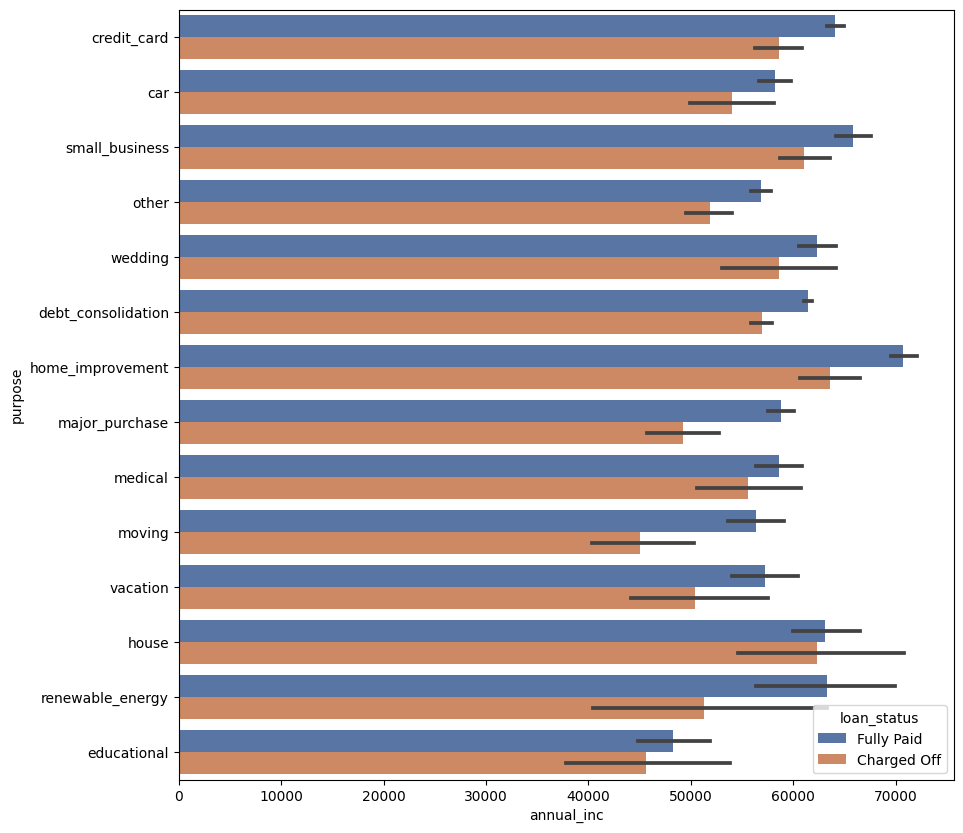

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

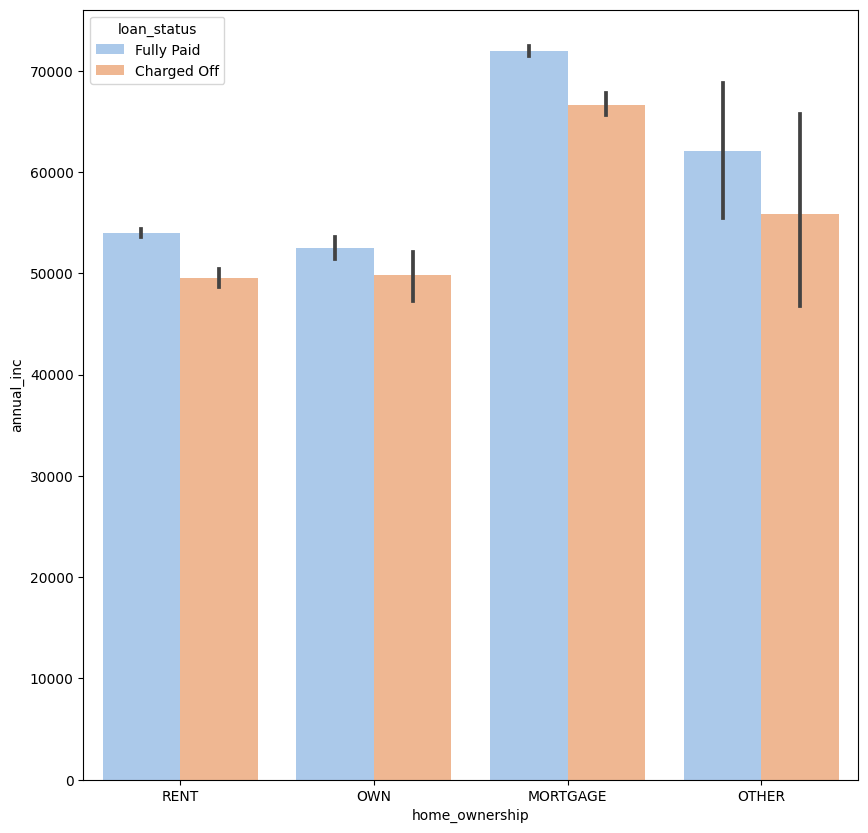

In [32]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()